In [2]:
import numpy as np
import matplotlib.pyplot as plt
import geone as gn


In [49]:
import pandas as pd

# test0 = pd.read_csv('D:\Data_processing/TI_DATA.csv', header = None).values
# training0 = pd.read_csv('D:\地勘数据CPT钻孔\\6号线/TI1.csv', header = None).values
# test0=test0.reshape(-1)
# training0 =training0 .reshape(-1)
# print(test0)
# np.savetxt('D:\Data_processing/TI2.txt',training0,fmt='%1e')
# np.savetxt('D:\Data_processing/training0.txt',training0,fmt='%1e')


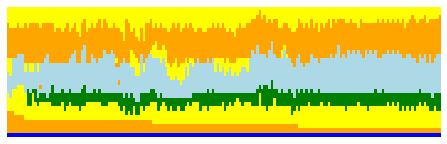

In [159]:
ti=gn.img.readImageGslib('D:\轨道资料\\6号线勘察报告\TI_spt.txt')
# ti=gn.img.readImageGslib('D:\地勘数据CPT钻孔\\6号线/TI.txt')
facies_col=['orange','yellow','green','lightblue','blue']
vcount_min=ti.vmin()[0]
vcount_max=ti.vmax()[0]
vcount_cmap=gn.customcolors.cmap2

#display
# plt.subplots(2,1,figsize=(16,8))
plt.figure(figsize=(8,8))
# plt.subplot(2,1,1)
ax,cbar=gn.imgplot.drawImage2D(ti,iv=0,categ=True,categCol=facies_col)
plt.axis('off')
cbar.remove()
# plt.subplot(2,1,2)
# gn.imgplot.drawImage2D(ti,iv=0, cmap=vcount_cmap, vmin=vcount_min,vmax=vcount_max)
plt.savefig("D:/ti1.png")
plt.show()


In [166]:
nx,ny,nz=200,30,1
sx,sy,sz=50,100,1.0
ox,oy,oz=0.0,0.0,0.0

In [52]:
# hd_index0=np.where(~np.isnan(hd.val[3]))[0]
# print(np.where(~np.isnan(hd.val[3])))
#
# hd_col0=[facies_col[int(hd.val[3][i])] for i in hd_index0]
# hd_index1=np.where(~np.isnan(hd.val[4]))[0]
# hd_col1=[vcount_cmap((hd.val[4][i]-vcount_min) / (vcount_max-vcount_min)) for i in hd_index1]

In [167]:
npt=20
nv=4
varname=['x','y','z','code']
v=np.array([
    [2000.5, 500.5, 0.5, 4],
    [2000.5, 1000.5, 0.5, 5],
    [2000.5, 1500.5, 0.5, 6],
    [2000.5, 2400.5, 0.5, 3],
    [2000.5, 2900.5, 0.5, 4],
    [4000.5, 500.5, 0.5, 3],
    [4000.5, 1000.5, 0.5, 5],
    [4000.5, 1500.5, 0.5, 6],
    [4000.5, 2400.5, 0.5, 4],
    [4000.5, 2900.5, 0.5, 3],
    [6000.5, 500.5, 0.5, 4],
    [6000.5, 1000.5, 0.5, 6],
    [6000.5, 1500.5, 0.5, 4],
    [6000.5, 2400.5, 0.5, 3],
    [6000.5, 2900.5, 0.5, 3],
    [8000.5, 500.5, 0.5, 4],
    [8000.5, 1000.5, 0.5, 5],
    [8000.5, 1500.5, 0.5, 6],
    [8000.5, 2400.5, 0.5, 3],
    [8000.5, 2900.5, 0.5, 4],
]).T

hd=gn.img.PointSet(npt=npt,nv=nv,varname=varname,val=v)

hd_col=[facies_col[int(v)-3] for v in hd.val[3]]
#fill the input structure for deesse and launch deesse
nreal=100
deesse_input=gn.deesseinterface.DeesseInput(
    nx=nx,ny=ny,nz=nz,
    sx=sx,sy=sy,sz=sz,
    ox=ox,oy=oy,oz=oz,
    nv=1,varname='code',
    nTI=1, TI=ti,
    dataPointSet=hd,
    distanceType='categorical',
    nneighboringNode=24,
    distanceThreshold=0.05,
    maxScanFraction=0.25,
    npostProcessingPathMax=1,
    seed=444,
    nrealization=nreal)
deesse_output=gn.deesseinterface.deesseRun(deesse_input)

DeeSse running... [VERSION 3.2 / BUILD NUMBER 20211028 / OpenMP 15 thread(s)]
DeeSse run complete


<ipython-input-168-35ad296be882>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,8))


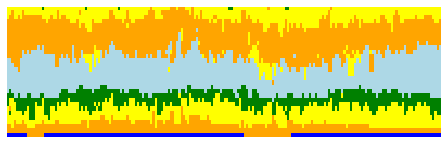

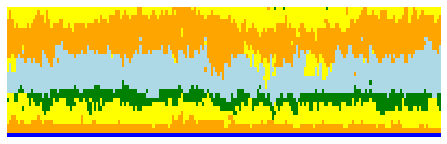

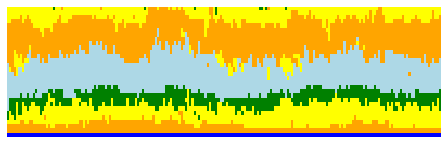

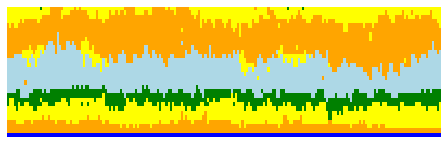

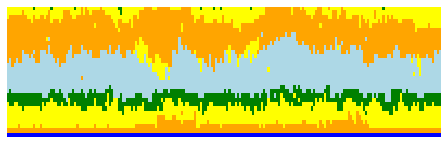

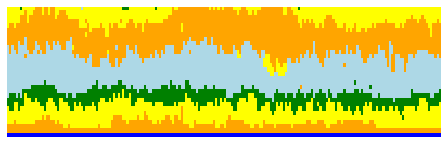

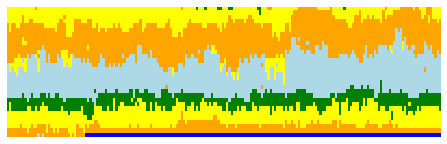

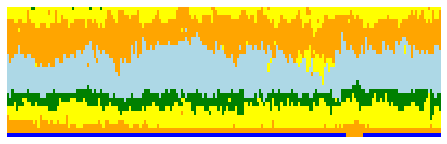

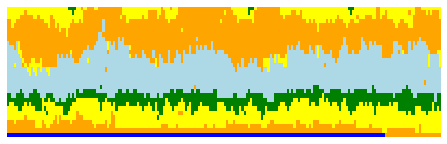

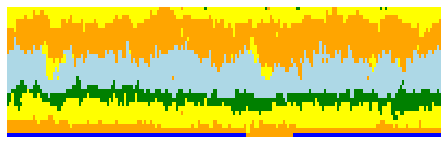

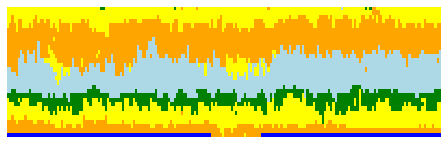

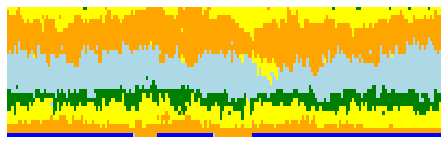

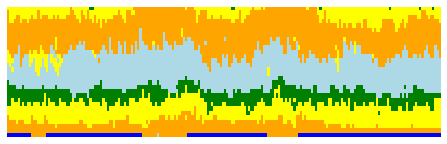

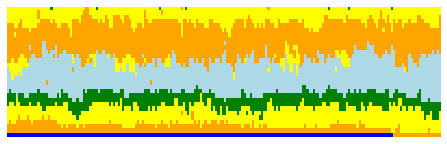

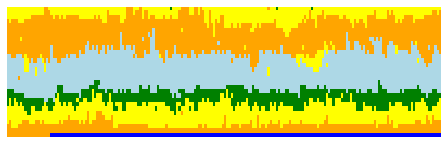

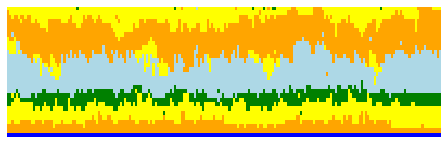

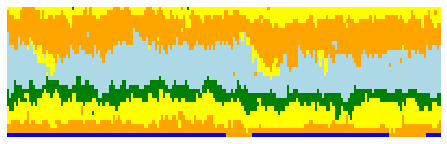

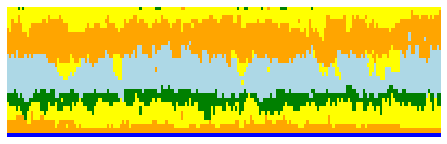

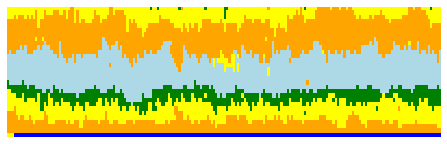

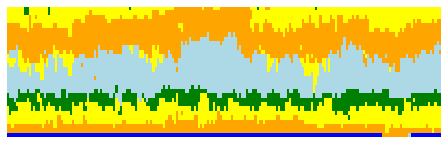

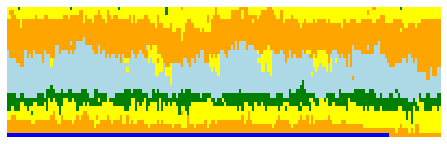

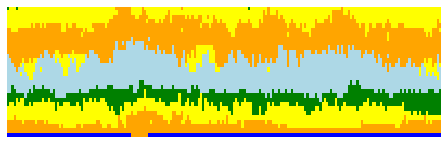

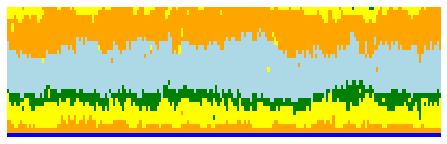

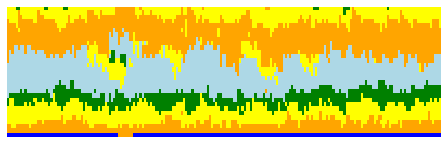

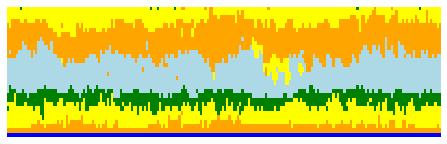

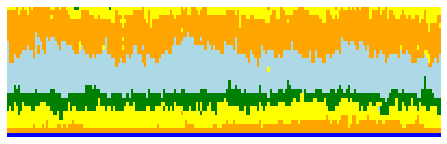

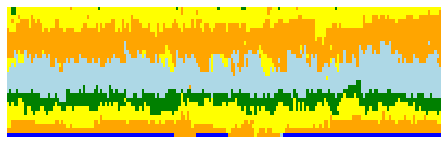

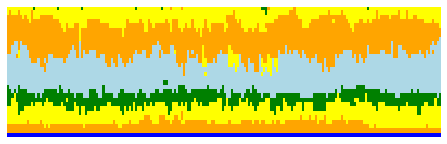

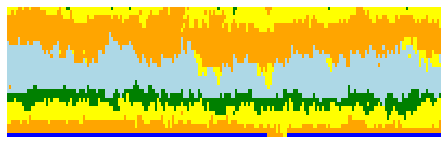

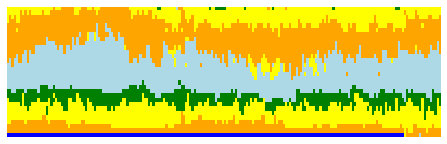

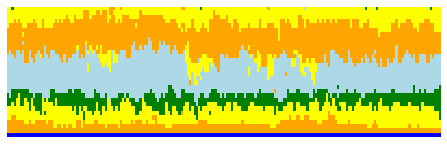

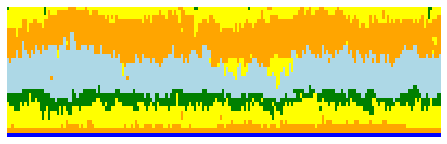

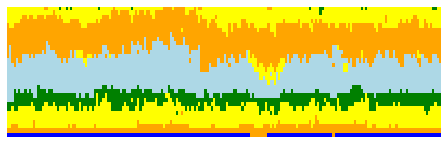

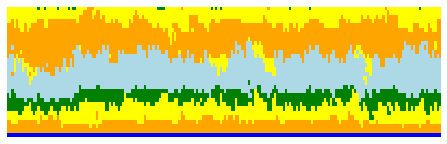

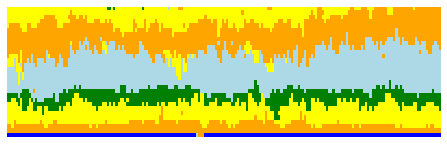

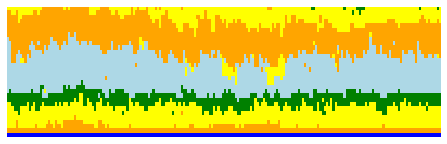

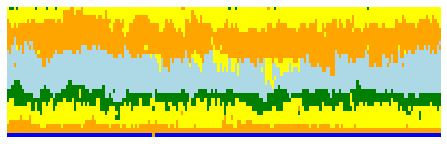

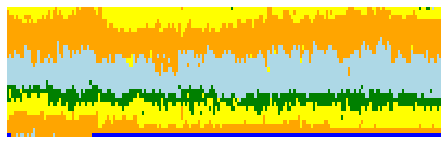

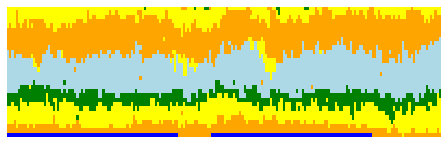

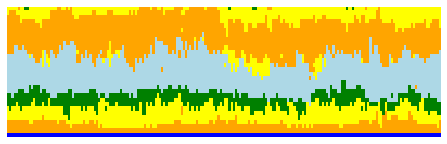

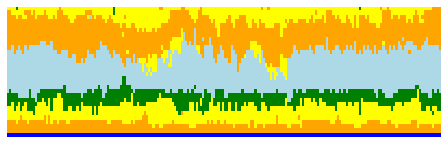

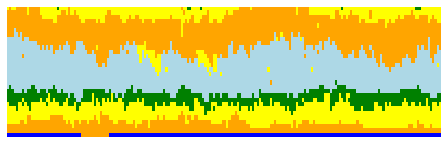

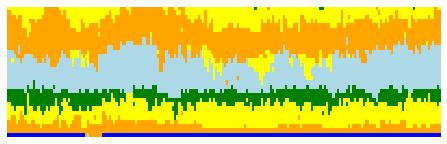

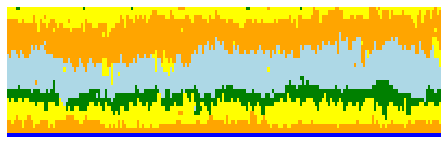

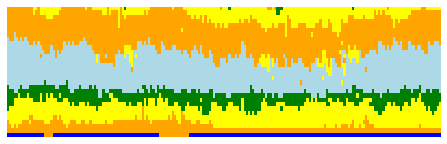

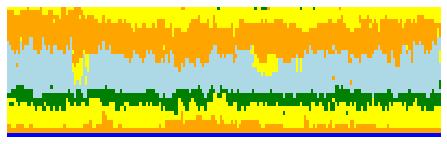

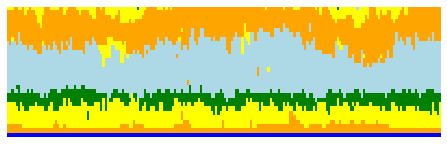

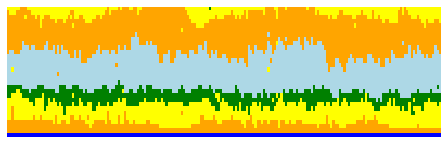

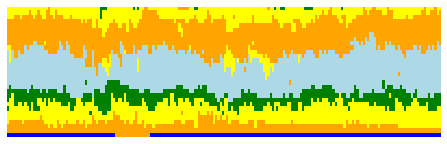

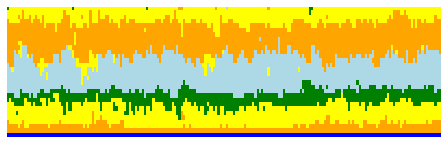

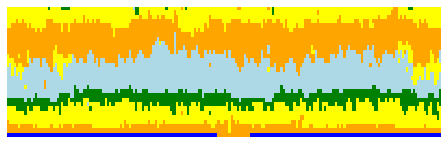

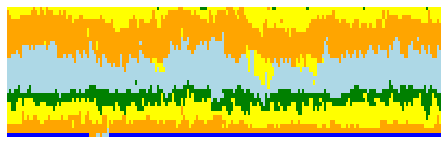

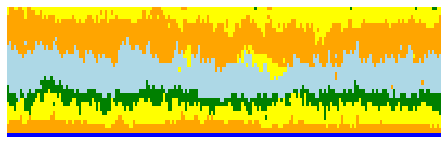

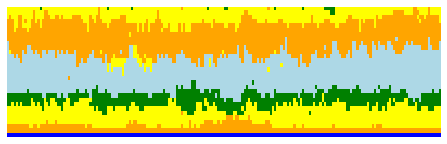

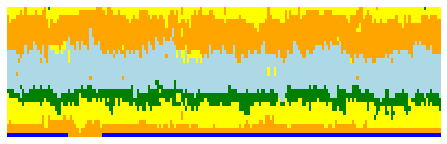

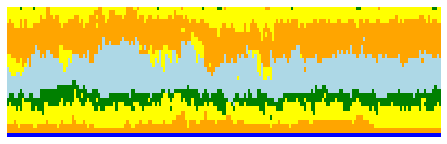

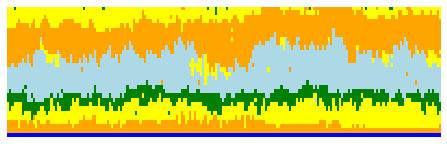

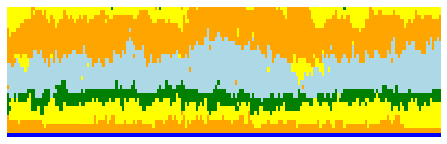

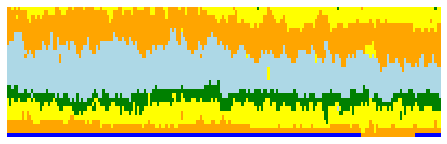

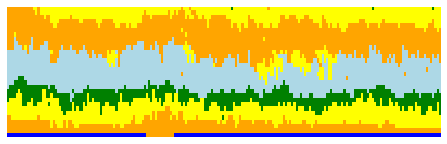

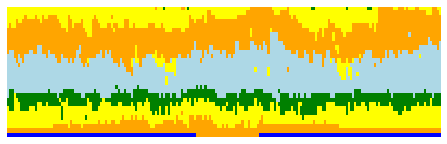

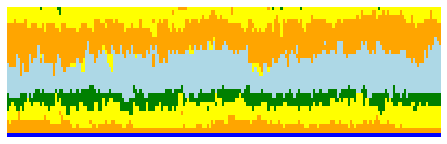

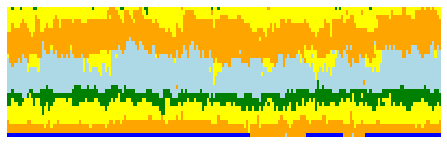

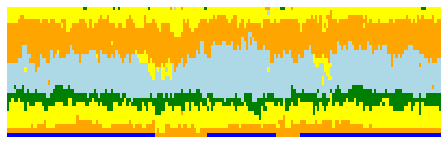

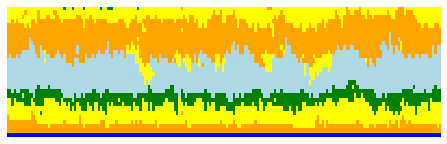

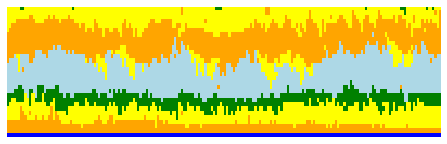

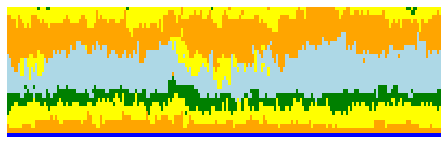

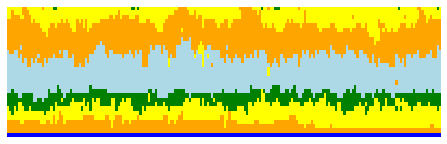

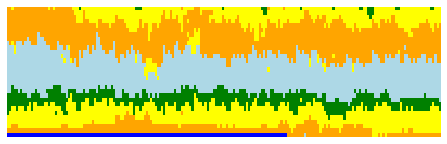

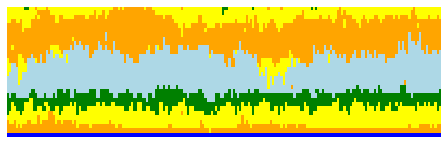

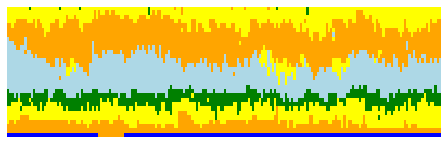

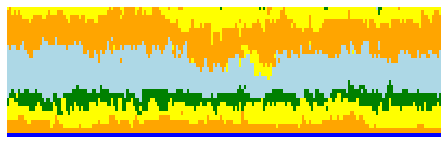

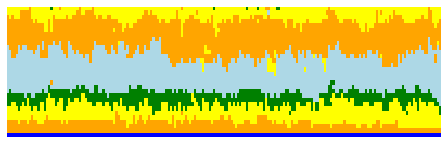

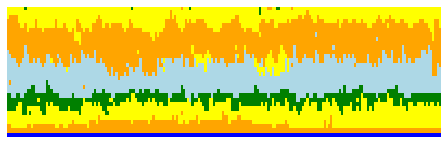

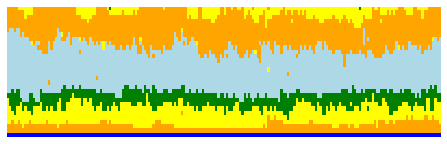

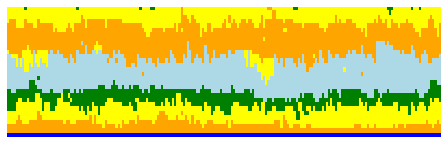

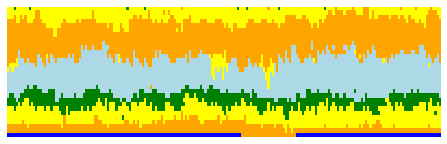

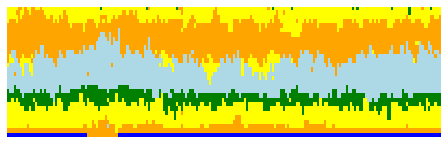

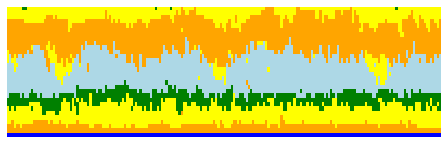

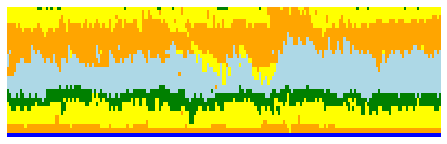

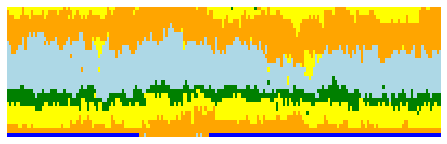

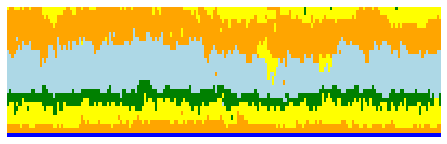

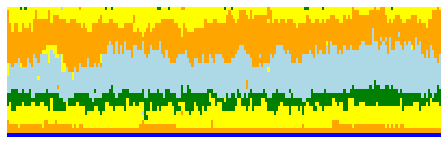

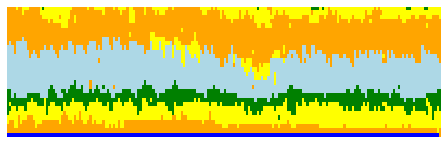

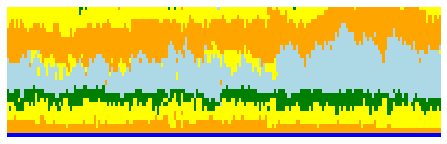

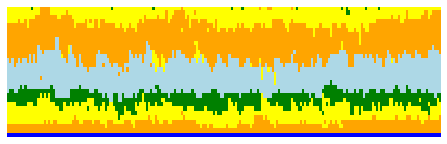

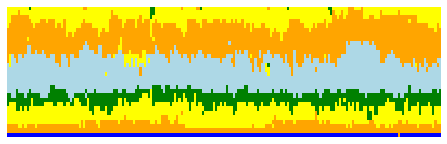

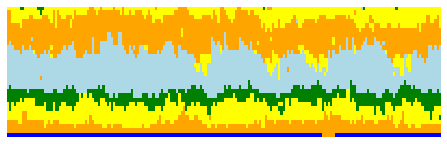

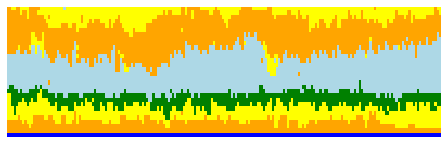

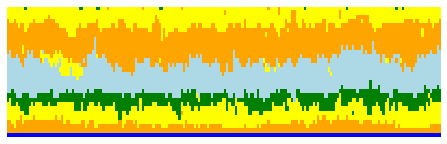

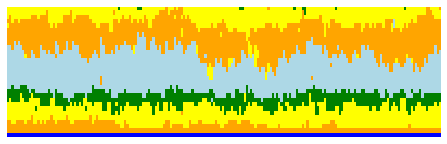

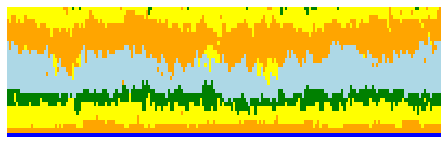

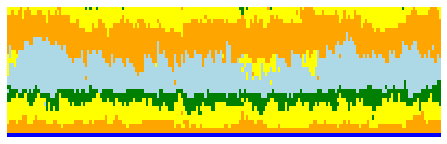

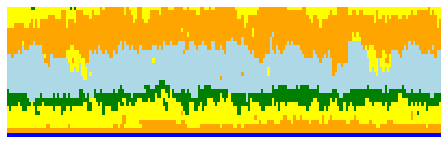

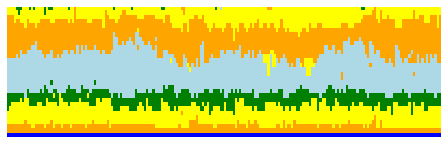

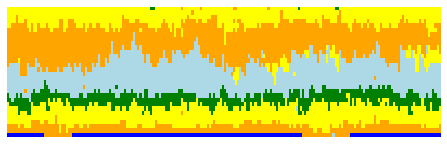

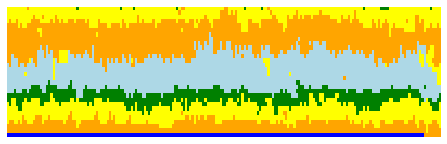

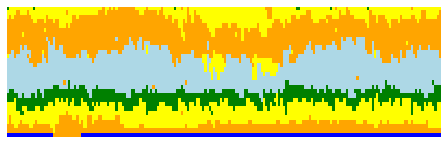

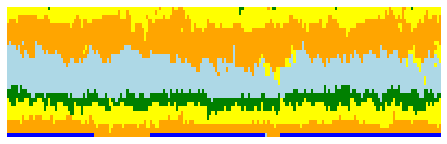

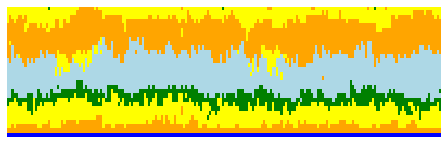

In [168]:
sim=deesse_output['sim']

for i in range(0,nreal):
    plt.figure(figsize=(8,8))
    ax,cbar=gn.imgplot.drawImage2D(sim[i],categ=True,categCol=facies_col)
                           # title='real # {} (not accounring for non-stationarity)'.format(i))
    # plt.scatter(hd.x(),hd.y(),marker='o',s=30,
    #             color=hd_col, edgecolors='k', linewidths=1)
    plt.axis('off')
    cbar.remove()
    plt.savefig("D:/t{}.png".format(i))
    # plt.show()

In [5]:
from PIL import Image
from numpy import average, dot, linalg
import cv2

# img2=np.ascontiguousarray(img2)
# H1 = cv2.calcHist([img1], [1], None, [256], [0, 256])
# H1 = cv2.normalize(H1, H1, 0, 1, cv2.NORM_MINMAX, -1)
# plt.plot(H1)
def get_thum(image, size=(64, 64), greyscale=False):
    # 利用image对图像大小重新设置, Image.ANTIALIAS为高质量的
    image = image.resize(size, Image.ANTIALIAS)
    if greyscale:
        # 将图片转换为L模式，其为灰度图，其每个像素用8个bit表示
        image = image.convert('L')
    return image
def image_similarity_vectors_via_numpy(image1,image2):
    image1=get_thum(image1)
    image2=get_thum(image2)
    images=[image1,image2]
    vectors=[]
    norms=[]
    for image in images:
        vector=[]
        for pixel_tuple in image.getdata():
            vector.append(average(pixel_tuple))
        vectors.append(vector)
        norms.append(linalg.norm(vector,2))
    a,b=vectors
    a_norm,b_norm=norms
    res=dot(a/a_norm,b/b_norm)
    return res
def make_regular_image(img,size=(64,64)):
    gey_image=img.resize(size).convert('RGB')
    return gey_image
def hist_similar(lh,rh):
    assert len(lh)==len(rh)
    hist=sum(1-(0 if 1==r else float(abs(l-r))/max(l,r)) for l,r in zip(lh,rh))/len(lh)
    return hist
def calc_similar(li,ri):
    calc_sim=hist_similar(li.histogram(),ri.histogram())
    return calc_sim

img2=Image.open("D:/相似度图/ti1.png")
img2 = img2.resize((64,64), Image.ANTIALIAS)
# img1=make_regular_image(img1)
# img2=make_regular_image(img2)
# print(calc_similar(img1,img2))
cosin=np.zeros((100,2))
for i in range(0,100):
    img1=Image.open("D:/相似度图/tt{}.png".format(i))
    cosin[i,0]=i
    cosin[i,1]=image_similarity_vectors_via_numpy(img1,img2)
    # print('{}'.format(i),cosin)

In [6]:

img3=Image.open("D:/相似度图/tt{}.png".format(31))
img2=Image.open("D:/相似度图/{}.png".format(17))
img1=Image.open("D:/相似度图/ti2.png")
img1 = img1.resize((64,64), Image.ANTIALIAS)
cosin1=image_similarity_vectors_via_numpy(img1,img3)
cosin2=image_similarity_vectors_via_numpy(img2,img3)

In [7]:
import imagehash
def ahash(image):
    image=cv2.resize(image,(8,8),interpolation=cv2.INTER_CUBIC)
    #将图片转化为灰度图
    gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    #s为像素和锤石灰度值
    s=0
    ahash_str=''
    for i in range(8):
        for j in range(8):
            s=s+gray[i,j]
    avg=s/64
    ahash_str=''
    for i in range(8):
        for j in range(8):
            if gray[i,j]>avg:
                ahash_str=ahash_str+'1'
            else:
                ahash_str=ahash_str+'0'
    result=''
    for i in range(0,64,4):
        result += ''.join('%x' % int(ahash_str[i:i+4],2))
    return  result

# 计算两个哈希值之间的差异
def campHash(hash1, hash2):
    hash1=str(hash1)
    hash2=str(hash2)
    n = 0
    # hash长度不同返回-1,此时不能比较
    if len(hash1) != len(hash2):
        return -1
    # 如果hash长度相同遍历长度
    for i in range(len(hash1)):
        if hash1[i] != hash2[i]:
            n = n + 1
    return n
img1_ahash=imagehash.average_hash(img1)
img2_ahash=imagehash.average_hash(img2)
img3_ahash=imagehash.average_hash(img3)
img1_phash=imagehash.phash(img1)
img2_phash=imagehash.phash(img2)
img3_phash=imagehash.phash(img3)
img1_dhash=imagehash.dhash(img1)
img2_dhash=imagehash.dhash(img2)
img3_dhash=imagehash.dhash(img3)
print(campHash(img1_ahash,img2_ahash))
print(campHash(img1_ahash,img3_ahash))
print(campHash(img1_dhash,img2_dhash))
print(campHash(img1_dhash,img3_dhash))
print(campHash(img1_phash,img2_phash))
print(campHash(img1_phash,img3_phash))

9
11
15
13
14
15


In [ ]:
count=np.zeros((21,4))
for i in range(0,20):
    sim_val=sim[i].val[0][0]
    for j in range(0,300):
        for s in range(0,400):
            if sim_val[j][s]==3:
                count[i][0]=count[i][0]+1
            if sim_val[j][s]==4:
                count[i][1]=count[i][1]+1
            if sim_val[j][s]==5:
                count[i][2]=count[i][2]+1
            if sim_val[j][s]==6:
                count[i][3]=count[i][3]+1

ti_val=ti.val[1][0]
for j in range(0,300):
     for s in range(0,196):
        if ti_val[j][s]==3:
            count[20][0]=count[20][0]+1
        if ti_val[j][s]==4:
            count[20][1]=count[20][1]+1
        if ti_val[j][s]==5:
            count[20][2]=count[20][2]+1
        if ti_val[j][s]==6:
            count[20][3]=count[20][3]+1

In [9]:
from sys import argv
from base64 import  b64encode
from json import dumps
ENCODING='utf-8'
IMAGE_NAME="D:/ti2.jpg"
JSON_NAME="D:/ti2.json"
with open(IMAGE_NAME,'rb') as jpg_file:
    byte_content=jpg_file.read()

    base64_bytes=b64encode(byte_content)
    base64_string=base64_bytes.decode(ENCODING)

    raw_data={}
    raw_data['name']=IMAGE_NAME
    raw_data['image_base64_string']=base64_string
    json_data=dumps(raw_data,indent=2)

    with open(JSON_NAME,'w') as json_file:
        json_file.write(json_data)